In [ ]:
# kaggle setting / upload API Token
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list


# download dataset dari https://www.kaggle.com/sshikamaru/fruit-recognition
!kaggle datasets download -d sshikamaru/fruit-recognition

Saving kaggle.json to kaggle.json
ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
shreyanshverma27/online-sales-dataset-popular-marketplace-data  Online Sales Dataset - Popular Marketplace Data      7KB  2024-05-25 23:55:26           3185         60  1.0              
devarajv88/walmart-sales-dataset                                e-Commerce (Walmart) Sales Dataset                   5MB  2024-05-30 12:09:55           2018         33  1.0              
ayushparwal2026/country-population-from-1960-to-2022            Country Population from 1960 to 2022                75KB  2024-05-31 08:58:26           1526         39  0.9411765        
mayankanand2701/apple-stock-pri

In [ ]:
# ekstrak file zip
import os
import zipfile
fz = '/content/fruit-recognition.zip'
ekstrak = zipfile.ZipFile(fz, 'r')
ekstrak.extractall('/content')

!rm -rf /content/test/
path = '/content/train/train'

In [ ]:
!pip install split-folders


In [ ]:
# menggunakan split_folders untuk memisahkan train sama validasi
import splitfolders
splitfolders.ratio(path,
                   output='/content/dataset',
                   seed=13,
                   ratio=(.8, .2))

Copying files: 16854 files [00:02, 7282.74 files/s]


In [ ]:
# mendefinisikan path dataset
main_dir = '/content/dataset'
tr = os.path.join(main_dir, 'train')
va = os.path.join(main_dir, 'val')

# join path nya train
applebraeburn_tr = os.path.join(tr, 'Apple Braeburn')
applegrannysmith_tr = os.path.join(tr, 'Apple Granny Smith')
apricot_tr = os.path.join(tr, 'Apricot')
avocado_tr = os.path.join(tr, 'Avocado')
banana_tr = os.path.join(tr, 'Banana')
blueberry_tr = os.path.join(tr, 'Blueberry')
cactusfruit_tr = os.path.join(tr, 'Cactus fruit')
cantaloupe_tr = os.path.join(tr, 'Cantaloupe')
cherry_tr = os.path.join(tr, 'Cherry')
celementine_tr = os.path.join(tr, 'Clementine')
corn_tr = os.path.join(tr, 'Corn')
cucumberripe_tr = os.path.join(tr, 'Cucumber Ripe')
grapeblue_tr = os.path.join(tr, 'Grape Blue')
kiwi_tr = os.path.join(tr, 'Kiwi')
lemon_tr = os.path.join(tr, 'Lemon')
limes_tr = os.path.join(tr, 'Limes')
manggo_tr = os.path.join(tr, 'Manggo')
onionwhite_tr = os.path.join(tr, 'Onion White')
orange_tr = os.path.join(tr, 'Orange')
papaya_tr = os.path.join(tr, 'Papaya')
passionfruit_tr = os.path.join(tr, 'Passion Fruit')
peach_tr = os.path.join(tr, 'Peach')
pear_tr = os.path.join(tr, 'Pear')
peppergreen_tr = os.path.join(tr, 'Pepper Green')
pepperred_tr = os.path.join(tr, 'Pepper Red')
pineapple_tr = os.path.join(tr, 'Pineapple')
plum_tr = os.path.join(tr, 'Plum')
pomegranate_tr = os.path.join(tr, 'Pomegranate')
potato_tr = os.path.join(tr, 'Potato Red')
raspberry_tr = os.path.join(tr, 'Raspberry')
strawberry_tr = os.path.join(tr, 'Strawberry')
tomato_tr = os.path.join(tr, 'Tomato')
watermelon_tr = os.path.join(tr, 'Watermelon')

# join path nya val
applebraeburn_va = os.path.join(va, 'Apple Braeburn')
applegrannysmith_va = os.path.join(va, 'Apple Granny Smith')
apricot_va = os.path.join(va, 'Apricot')
avocado_va = os.path.join(va, 'Avocado')
banana_va = os.path.join(va, 'Banana')
blueberry_va = os.path.join(va, 'Blueberry')
cactusfruit_va = os.path.join(va, 'Cactus fruit')
cantaloupe_va = os.path.join(va, 'Cantaloupe')
cherry_va = os.path.join(va, 'Cherry')
celementine_va = os.path.join(va, 'Clementine')
corn_va = os.path.join(va, 'Corn')
cucumberripe_va = os.path.join(va, 'Cucumber Ripe')
grapeblue_va = os.path.join(va, 'Grape Blue')
kiwi_va = os.path.join(va, 'Kiwi')
lemon_va = os.path.join(va, 'Lemon')
limes_va = os.path.join(va, 'Limes')
manggo_va = os.path.join(va, 'Manggo')
onionwhite_va = os.path.join(va, 'Onion White')
orange_va = os.path.join(va, 'Orange')
papaya_va = os.path.join(va, 'Papaya')
passionfruit_va = os.path.join(va, 'Passion Fruit')
peach_va = os.path.join(va, 'Peach')
pear_va = os.path.join(va, 'Pear')
peppergreen_va = os.path.join(va, 'Pepper Green')
pepperred_va = os.path.join(va, 'Pepper Red')
pineapple_va = os.path.join(va, 'Pineapple')
plum_va = os.path.join(va, 'Plum')
pomegranate_va = os.path.join(va, 'Pomegranate')
potato_va = os.path.join(va, 'Potato Red')
raspberry_va = os.path.join(va, 'Raspberry')
strawberry_va = os.path.join(va, 'Strawberry')
tomato_va = os.path.join(va, 'Tomato')
watermelon_va = os.path.join(va, 'Watermelon')

In [ ]:
# import library
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tr_idg = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    shear_range=0.2
    )
va_igd = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    fill_mode='nearest',
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

tr_generator = tr_idg.flow_from_directory(
    tr,
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical',
    shuffle=True
)

va_generator = va_igd.flow_from_directory(
    va,
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical',
    shuffle=True
)

Found 13471 images belonging to 33 classes.
Found 3383 images belonging to 33 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2), ### added
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),### added
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(33, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       7

In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92):
      print("\nAkurasi telah mencapai >92%!")
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
    tr_generator,
    steps_per_epoch=35,
    epochs=100,
    validation_data=va_generator,
    validation_steps=5,
    verbose=2,
    callbacks=[callbacks])

Epoch 1/100
35/35 - 9s - loss: 3.5121 - accuracy: 0.0357 - val_loss: 3.4873 - val_accuracy: 0.0000e+00 - 9s/epoch - 247ms/step
Epoch 2/100
35/35 - 1s - loss: 3.4516 - accuracy: 0.0714 - val_loss: 3.4339 - val_accuracy: 0.0000e+00 - 1s/epoch - 35ms/step
Epoch 3/100
35/35 - 1s - loss: 3.1360 - accuracy: 0.1143 - val_loss: 3.1843 - val_accuracy: 0.2000 - 1s/epoch - 35ms/step
Epoch 4/100
35/35 - 1s - loss: 3.0291 - accuracy: 0.1214 - val_loss: 2.5403 - val_accuracy: 0.2000 - 1s/epoch - 39ms/step
Epoch 5/100
35/35 - 1s - loss: 2.7753 - accuracy: 0.1571 - val_loss: 2.2495 - val_accuracy: 0.2000 - 1s/epoch - 35ms/step
Epoch 6/100
35/35 - 1s - loss: 2.3985 - accuracy: 0.2643 - val_loss: 2.5411 - val_accuracy: 0.2000 - 1s/epoch - 34ms/step
Epoch 7/100
35/35 - 1s - loss: 2.0488 - accuracy: 0.2714 - val_loss: 1.8773 - val_accuracy: 0.5000 - 1s/epoch - 35ms/step
Epoch 8/100
35/35 - 1s - loss: 1.7452 - accuracy: 0.4286 - val_loss: 1.2906 - val_accuracy: 0.6500 - 1s/epoch - 35ms/step
Epoch 9/100
35/

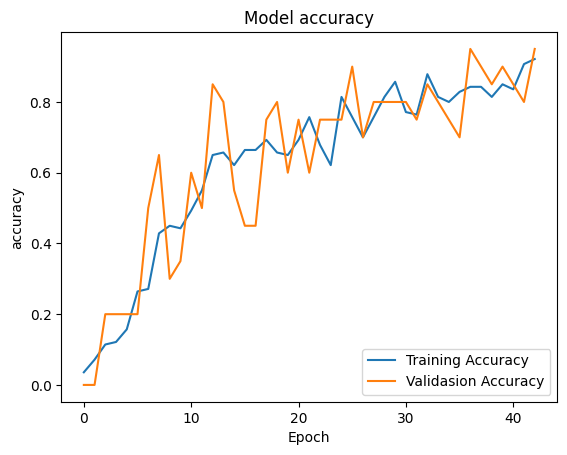

In [ ]:
# liat grafik akurasi
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validasion Accuracy')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#liat versi tf
print(tf.__version__)

2.15.0


In [ ]:
model.save('/content/savemodel', include_optimizer=True)

In [ ]:
# Convert the model
saved_model_dir = '/content/savemodel'
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load and preprocess the image
image_path = '/content/dataset/train/Blueberry/Blueberry_0.jpg'
image = load_img(image_path, target_size=(150, 150))  # Resize to the target size used during training
img_array = img_to_array(image)
img_array = img_array / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array.astype(np.float32)  # Ensure the data type matches the model's input type

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], img_array)

# Run inference
interpreter.invoke()

# Get the output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])

# Post-process the output to get the predicted class
predicted_class = np.argmax(output_data, axis=1)

# Map the index to class names
class_names = ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana',
               'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine',
               'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes',
               'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach',
               'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate',
               'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']

print(f"Predicted class: {class_names[predicted_class[0]]}")


Predicted class: Blueberry


In [ ]:
# Run this to prevent runtime disconnect
print(input('press enter to continue...'))

press enter to continue...

